<h2><b> Nomes: Adriana Zanol, Kalel Branco Chaves, Rafael Smiderle

In [1]:
%config Completer.use_jedi = False
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

DataSet escolhido
https://www.kaggle.com/rikdifos/credit-card-approval-prediction


In [2]:
data_df = pd.read_csv("application_record.csv")
#data_df = pd.read_csv(filepath_or_buffer='application_record.csv.zip', compression='zip')

<h1> 1. Verificar se o dataset tem problema de ruídos ou dados faltantes. Caso um dos problemas seja identificado, aplicar um método para tratar o problema. 

In [3]:
# Verificando tamanho do dataset. (linhas, colunas)
data_df.shape

(438557, 18)

In [4]:
# Verificando dados faltantes
data_df.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [5]:
# Preenchendo informações nulas.
data_df.OCCUPATION_TYPE = data_df.OCCUPATION_TYPE.fillna("uninformed")
data_df.isnull().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_MOBIL             0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [6]:
# Removido colunas desnecessárias
data_df = data_df.drop(['ID'], axis= 1)

In [7]:
data_df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [8]:
# Analisando tipos de dados para ver se fazem sentido com o conteúdo.
data_df.dtypes

CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [9]:
data_df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [10]:
# temos problemas com outliers, como é o caso do DAYS_EMPLOYED, pelo calculado algumas pessoas estão a 1000 anos sem emprego.
# Pela documentação
# DAYS_EMPLOYED = Faça a contagem regressiva a partir do dia atual (0). Se positivo, significa que a pessoa atualmente desempregada.
# Provavelmente deve ser para gerar outliers ao processo para garantir que as pessoas que nunca trabalharam não vão receber crédito. 
# Para fins didáticos vou extrair uma amostra sem estes casos.

# Pessoa empregada por 1000 anos. Considerando o "max" da coluna DAYS_EMPLOYED
365243 / 365.25

999.98083504449

<b>Parece que o valor 365243 é usado para indicar que a pessoa nunca trabalhou pois representa 999 anos</b> <br>

<b>Nota-se que o alto valor adotado na variável DAYS_EMPLOYED para indicar que a pessoa nunca trabalhou configura um outlier

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000208061DD688>,
      dtype=object)

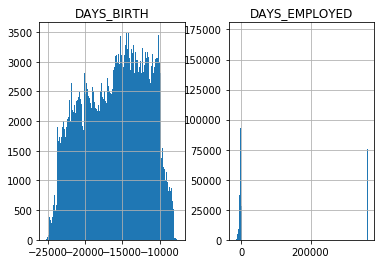

In [11]:
data_df[['DAYS_BIRTH','DAYS_EMPLOYED']].hist(bins=200)

<b> Também se nota que neste dataset, apesar de estar descrito que um número positivo no campo DAYS_EMPLOYED indicaria o número de dias desempregado, o único valor positivo existente é 999 anos

In [12]:
data_df[data_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].describe()

count     75329.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

<b> Por isso foi criado o df2 com o intuito de melhor visualizar os dados. 
    Foi criada uma variável categórica indicando se a pessoa nunca trabalhou e mais duas variáveis numéricas com o número de dias empregado e o número 
    

In [13]:
data_df[data_df['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED'].describe()

count     75329.0
mean     365243.0
std           0.0
min      365243.0
25%      365243.0
50%      365243.0
75%      365243.0
max      365243.0
Name: DAYS_EMPLOYED, dtype: float64

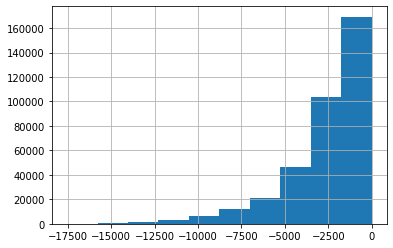

In [14]:
df2 = data_df[data_df['DAYS_EMPLOYED'] < 0]
df2['DAYS_EMPLOYED'].hist()

In [15]:
#Extraindo amostra, vou deixar os dados originais em outro dataframe.
#Para os fins desse exercício, as instâncias com DAYS_EMPLOYED = 999 anos foram removidas para não gerar overfit. 
#Em uma situação real deveríamos pensar em uma estratégia para lidar com isso
df_original = data_df
data_df = data_df.loc[ (data_df.DAYS_EMPLOYED < 365243) ]
data_df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,363228.000000,3.632280e+05,363228.000000,363228.000000,363228.0,363228.000000,363228.000000,363228.000000,363228.000000
mean,0.507483,1.945939e+05,-14812.161711,-2623.052700,1.0,0.248882,0.286635,0.118815,2.290503
std,0.764181,1.141686e+05,3501.319668,2399.514253,0.0,0.432366,0.452190,0.323571,0.926890
min,0.000000,2.700000e+04,-24834.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.350000e+05,-17455.000000,-3512.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,0.000000,1.800000e+05,-14580.000000,-1924.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,1.000000,2.250000e+05,-11938.000000,-915.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,19.000000,6.750000e+06,-7489.000000,-12.000000,1.0,1.000000,1.000000,1.000000,20.000000


<h1> 2. Gerar um “sample” do dataset  que mantenha as características originais dos dados. Escolha um método e utilize a função resample do sklearn.utils.

In [16]:
from sklearn.utils import resample
data_df_res = data_df
resample(data_df,data_df_res, n_samples=5, replace=False)
data_df_res.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


<h1>3.Escolher um atributo categóricos e utilizar a função OneHotEncoder  
para transformar em codificação inteira-binária os valores nominais .

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder

In [17]:
# Analisando tipos de dados para ver se fazem sentido com o conteúdo.
data_df.dtypes

CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [18]:
# Inspeção visual do dataset
data_df.head()  

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [19]:
data_df['CODE_GENDER'].isnull().sum()

0

In [20]:
# Técnica OneHotEncoder utilizada no campo CODE_GENDER

enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(data_df[['CODE_GENDER']]).toarray())
new_df = data_df.join(enc_df)
new_df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,0,1
0,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0,0.0,1.0
1,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,uninformed,2.0,0.0,1.0
2,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0.0,1.0
3,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1.0,0.0
4,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438547,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,1,0,0,0,uninformed,2.0,NaN,NaN
438548,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0,NaN,NaN
438553,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0,NaN,NaN
438554,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0,NaN,NaN


Conversão manual de atributos categóricos para numéricos

<h1>4.Aplicar pelo menos uma técnica de normalização no datase

In [21]:
temp = pd.DataFrame(data_df, columns = ["AMT_INCOME_TOTAL", "DAYS_BIRTH", "DAYS_EMPLOYED", "CNT_FAM_MEMBERS"])

In [22]:
print('Means before:\n', temp.mean(axis=0))
print('Standard Deviation before:\n', temp.std(axis=0))

Means before:
 AMT_INCOME_TOTAL    194593.886555
DAYS_BIRTH          -14812.161711
DAYS_EMPLOYED        -2623.052700
CNT_FAM_MEMBERS          2.290503
dtype: float64
Standard Deviation before:
 AMT_INCOME_TOTAL    114168.559505
DAYS_BIRTH            3501.319668
DAYS_EMPLOYED         2399.514253
CNT_FAM_MEMBERS          0.926890
dtype: float64


In [23]:
scaler_min_max = preprocessing.MinMaxScaler()
data_scaled = scaler_min_max.fit_transform(temp)

In [26]:
dfs = pd.DataFrame(columns=["AMT_INCOME_TOTAL","DAYS_BIRTH","DAYS_EMPLOYED","CNT_FAM_MEMBERS"], data= data_scaled)

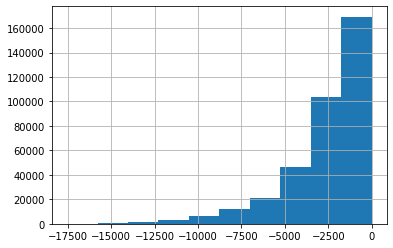

In [32]:
data_df['DAYS_EMPLOYED'].hist()

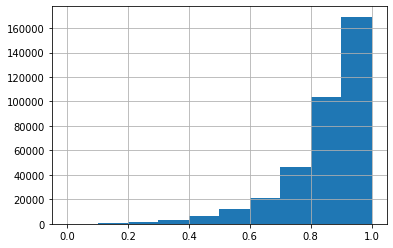

In [33]:
dfs['DAYS_EMPLOYED'].hist()

In [24]:
print('Means after (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS): ', data_scaled.mean(axis=0))
print('Standard Deviation after (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS): ', data_scaled.std(axis=0))

Means after (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS):  [0.02492844 0.57779408 0.8509588  0.06792124]
Standard Deviation after (AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS):  [0.01698176 0.20186306 0.13696621 0.04878361]
